# **Dataset - NBA Players Stats (Classificação)**

O objetivo do grupo ao analisar esse dataset é, por meio das estatisticas dos jogadores da NBA durante a temporada, descobrir qual a posição em que cada um deles joga.

## **1. Inserção das bibliotecas e leitura dos arquivos**

Nessa etapa será feita a leitura dos arquivos (datasets) a serem analisados pelo grupo, além da criação dos dataframes.

#### Imports Python

In [170]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None) # Para mostrar todas as colunas no .describe()

#### Leitura dos datasets

In [171]:
df_regular = pd.read_csv('NBA/2021-2022 NBA Player Stats - Regular.csv', encoding='latin-1', sep=';')
df_playoffs = pd.read_csv('NBA/2021-2022 NBA Player Stats - Playoffs.csv', encoding='latin-1', sep=';')


#### Juntando os dois datasets

In [172]:
df_total = pd.concat([df_regular, df_playoffs], ignore_index=True) # dataframe para EDA
df_final = df_total # dataframe final para análise em pré-processamento e predições
df_base = df_total # dataframe "bruto" para benchmark na etapa de predições

In [173]:
df_total.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,0.439,0.8,2.1,0.359,2.9,6.1,0.468,0.486,1.1,1.8,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,0.547,0.0,0.0,0.000,2.8,5.0,0.548,0.547,1.4,2.6,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,0.557,0.0,0.1,0.000,7.3,12.9,0.562,0.557,4.6,6.1,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,0.402,0.2,1.5,0.125,1.5,2.6,0.560,0.424,0.6,1.0,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,0.550,0.3,1.0,0.304,5.1,8.8,0.578,0.566,1.9,2.2,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


## **2. Analise Exploratória dos Dados**

PLACEHOLDER

O grupo iniciou utilizando a função .info() do dataframe, para verificar contagem total de valores não nulos e o tipo de dado de cada coluna

In [174]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1029 entries, 0 to 1028
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      1029 non-null   int64  
 1   Player  1029 non-null   object 
 2   Pos     1029 non-null   object 
 3   Age     1029 non-null   int64  
 4   Tm      1029 non-null   object 
 5   G       1029 non-null   int64  
 6   GS      1029 non-null   int64  
 7   MP      1029 non-null   float64
 8   FG      1029 non-null   float64
 9   FGA     1029 non-null   float64
 10  FG%     1029 non-null   float64
 11  3P      1029 non-null   float64
 12  3PA     1029 non-null   float64
 13  3P%     1029 non-null   float64
 14  2P      1029 non-null   float64
 15  2PA     1029 non-null   float64
 16  2P%     1029 non-null   float64
 17  eFG%    1029 non-null   float64
 18  FT      1029 non-null   float64
 19  FTA     1029 non-null   float64
 20  FT%     1029 non-null   float64
 21  ORB     1029 non-null   float64
 22  

In [175]:
df_total.describe(include='all') # Descrição do todo

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,1029.000000,1029,1029,1029.000000,1029,1029.000000,1029.000000,1029.000000,1029.00000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000,1029.000000
unique,NaN,606,11,NaN,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Greg Monroe,SG,NaN,TOT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,248,NaN,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,263.273081,NaN,NaN,26.165209,NaN,30.801749,14.001944,18.510787,2.90690,6.460641,0.428614,0.884645,2.590087,0.275859,2.023712,3.872789,0.489548,0.491689,1.254616,1.629640,0.650882,0.804665,2.542371,3.346939,1.812536,0.583188,0.355199,1.001263,1.610982,7.948397
std,175.235007,NaN,NaN,4.101807,NaN,25.821475,21.946566,10.417364,2.33211,4.931101,0.156789,0.870237,2.279284,0.167586,1.852919,3.401662,0.190048,0.167695,1.412751,1.740054,0.297500,0.767213,1.884674,2.462849,1.874005,0.441873,0.381993,0.892461,0.915318,6.481502
min,1.000000,NaN,NaN,19.000000,NaN,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,116.000000,NaN,NaN,23.000000,NaN,6.000000,0.000000,10.000000,1.20000,2.800000,0.378000,0.100000,0.700000,0.200000,0.600000,1.300000,0.439000,0.455000,0.300000,0.500000,0.591000,0.300000,1.200000,1.600000,0.500000,0.300000,0.100000,0.400000,1.000000,3.100000
50%,227.000000,NaN,NaN,25.000000,NaN,22.000000,3.000000,17.600000,2.40000,5.100000,0.439000,0.700000,2.100000,0.322000,1.500000,2.900000,0.511000,0.516000,0.900000,1.200000,0.750000,0.600000,2.300000,2.900000,1.100000,0.500000,0.300000,0.800000,1.600000,6.300000
75%,412.000000,NaN,NaN,29.000000,NaN,55.000000,17.000000,27.200000,4.00000,9.000000,0.500000,1.400000,4.000000,0.375000,2.900000,5.300000,0.581000,0.565000,1.600000,2.100000,0.840000,1.100000,3.400000,4.500000,2.400000,0.900000,0.500000,1.300000,2.300000,10.900000


Com base na descrição, é possível ver que há 31 times (a liga possui 30), e um time com sigla TOT. TOT é utilizado para sumarizar os dados de um jogador quando o mesmo jogou por mais de um time na temporada. Além disso, quando o jogador que jogou por mais de um time e jogou em posições distintas ele pode aparecer com uma "posição mista" (como 'SF-PF'). Isso atrapalharia o modelo.

In [176]:
df_total['Pos'].unique()

array(['C', 'PF', 'SG', 'PG', 'SF', 'SG-PG', 'SG-SF', 'PF-SF', 'PG-SG',
       'SF-SG', 'C-PF'], dtype=object)

Para confirmar a quantidade de posições registradas no dataset, o grupo utilizou a função .unique() na classe alvo. Os resultados mostram que existem posições mistas no dataset. Para checar se são originadas devido as linhas com TOT, iremos removê-las e rodar novamente. -> a remoção final deve vir dps

In [177]:
posicoes_para_remover = df_total[df_total['Tm'] == 'TOT'].index
df_total = df_total.drop(posicoes_para_remover)
df_total['Pos'].unique()

array(['C', 'PF', 'SG', 'PG', 'SF'], dtype=object)

É possível observar que agora apenas as posições originais do jogo estão no Dataset.

Além disso, o grupo observou que há jogadores com registro de 0 minutos jogados em média. Por isso, o grupo pretende remover qualquer jogador que tenha jogado, em média, menos de 1 minuto.

In [178]:
linhas_para_remover = df_total[df_total['MP'] < 1].index
df_total = df_total.drop(linhas_para_remover)
df_total['MP'].describe()

count    930.000000
mean      18.684409
std       10.617283
min        1.000000
25%       10.000000
50%       17.950000
75%       27.400000
max       44.000000
Name: MP, dtype: float64

O gráfico a seguir mostra a quantidade de jogadores por posição no dataset.

Percebe-se que há mais jogadores SG e menos C, indicando um leve desbalanceamento entre as classes.

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

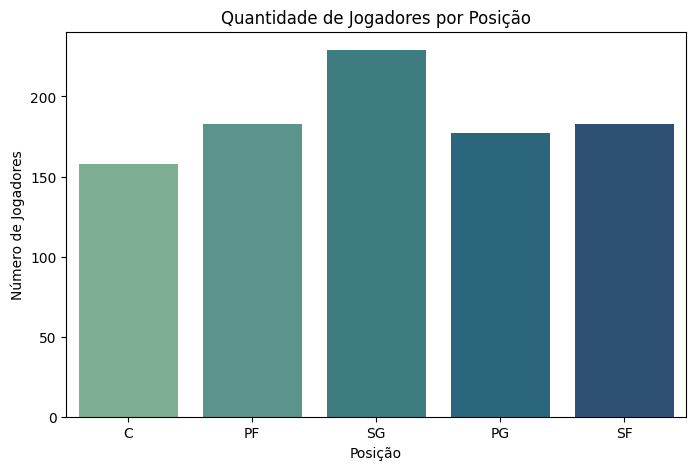

In [180]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_total, x='Pos', hue='Pos', palette='crest', legend=False)
plt.title('Quantidade de Jogadores por Posição')
plt.xlabel('Posição')
plt.ylabel('Número de Jogadores')
plt.show()

#### Descrevendo classe por classe

O grupo optou pela descrição classe por classe para obter um panorama geral dos dados, segregados por cada classe

In [181]:
display(df_total.describe())
display(df_total[df_total["Pos"] == "PG"].describe())
display(df_total[df_total["Pos"] == "SG"].describe())
display(df_total[df_total["Pos"] == "SF"].describe())
display(df_total[df_total["Pos"] == "PF"].describe())
display(df_total[df_total["Pos"] == "C"].describe())

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,258.883871,26.104301,30.029032,14.161290,18.684409,2.955591,6.551075,0.429587,0.895806,2.618710,0.274199,2.061075,3.934731,0.491081,0.492252,1.276774,1.656344,0.646900,0.808065,2.569355,3.377097,1.827634,0.588602,0.359462,1.010538,1.622903,8.079032
std,175.522230,4.122829,25.904316,22.213511,10.617283,2.380725,5.037101,0.160451,0.886530,2.318785,0.170199,1.892200,3.481297,0.194694,0.171669,1.438423,1.773458,0.301263,0.779700,1.918651,2.503595,1.890387,0.448558,0.391324,0.909711,0.930746,6.613798
min,1.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,110.250000,23.000000,6.000000,0.000000,10.000000,1.200000,2.800000,0.381250,0.100000,0.700000,0.200000,0.700000,1.300000,0.440000,0.457000,0.300000,0.500000,0.588750,0.300000,1.200000,1.600000,0.500000,0.300000,0.100000,0.400000,1.000000,3.100000
50%,217.000000,25.000000,21.000000,3.000000,17.950000,2.400000,5.200000,0.441000,0.700000,2.100000,0.320500,1.500000,3.000000,0.512500,0.517000,0.900000,1.200000,0.750000,0.600000,2.300000,3.000000,1.150000,0.500000,0.300000,0.800000,1.600000,6.400000
75%,406.750000,29.000000,54.000000,17.750000,27.400000,4.100000,9.100000,0.500000,1.400000,4.100000,0.376000,2.900000,5.400000,0.583000,0.567000,1.700000,2.200000,0.838000,1.100000,3.500000,4.500000,2.500000,0.900000,0.500000,1.300000,2.300000,11.075000
max,605.000000,41.000000,82.000000,82.000000,44.000000,12.200000,23.800000,1.000000,4.500000,11.700000,1.000000,11.200000,20.300000,1.000000,1.500000,9.600000,11.800000,1.000000,5.500000,12.000000,14.700000,10.800000,2.500000,2.800000,6.200000,5.000000,31.700000


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,273.367232,26.435028,29.033898,15.118644,20.403955,3.244068,7.730508,0.407480,1.123729,3.314124,0.291650,2.122599,4.419774,0.459701,0.476424,1.476271,1.817514,0.682537,0.422599,2.156497,2.575706,3.360452,0.759322,0.236158,1.368362,1.596045,9.083616
std,181.867227,4.352052,25.749867,23.168173,11.026983,2.527593,5.511380,0.153659,0.950061,2.490864,0.142786,1.880204,3.647961,0.184138,0.165455,1.580744,1.931756,0.324717,0.363612,1.615470,1.860482,2.534089,0.541290,0.259683,1.113458,0.927139,7.219718
min,6.000000,20.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,124.000000,23.000000,5.000000,0.000000,12.000000,1.300000,3.300000,0.361000,0.400000,1.400000,0.231000,0.700000,1.500000,0.409000,0.427000,0.300000,0.500000,0.667000,0.200000,1.100000,1.300000,1.200000,0.300000,0.000000,0.500000,0.900000,3.600000
50%,218.000000,25.000000,19.000000,3.000000,19.600000,2.700000,6.200000,0.411000,0.900000,2.800000,0.331000,1.700000,3.400000,0.471000,0.488000,1.000000,1.300000,0.796000,0.400000,1.800000,2.300000,2.900000,0.700000,0.200000,1.100000,1.600000,7.300000
75%,439.000000,29.000000,55.000000,18.000000,29.900000,4.500000,10.700000,0.467000,1.700000,5.100000,0.381000,3.000000,6.500000,0.524000,0.536000,2.000000,2.600000,0.870000,0.500000,2.900000,3.400000,5.200000,1.200000,0.300000,2.100000,2.300000,12.600000
max,602.000000,36.000000,81.000000,78.000000,43.500000,10.700000,23.500000,1.000000,4.500000,11.700000,0.714000,8.600000,16.200000,1.000000,1.000000,7.200000,9.700000,1.000000,1.800000,9.100000,9.800000,10.800000,2.300000,1.300000,6.200000,4.700000,31.700000


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000,229.000000
mean,275.056769,25.576419,29.069869,11.532751,18.466812,2.786026,6.638865,0.391118,1.137118,3.304803,0.289939,1.648035,3.340175,0.466956,0.469467,1.072052,1.338428,0.655301,0.443668,1.952402,2.393013,1.770306,0.589083,0.223144,0.908297,1.414410,7.778603
std,172.073147,3.930265,25.883925,19.164913,10.467600,2.279731,5.100690,0.156873,0.965943,2.476614,0.151339,1.547340,3.033736,0.215458,0.176291,1.210555,1.426260,0.321195,0.396383,1.251545,1.522217,1.667567,0.409443,0.233277,0.807297,0.865829,6.336626
min,4.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,133.000000,23.000000,5.000000,0.000000,9.700000,1.000000,2.700000,0.360000,0.300000,1.100000,0.250000,0.500000,1.100000,0.416000,0.450000,0.300000,0.300000,0.600000,0.200000,1.000000,1.300000,0.500000,0.300000,0.000000,0.300000,0.800000,2.800000
50%,239.000000,25.000000,19.000000,1.000000,18.500000,2.200000,5.300000,0.409000,1.000000,2.900000,0.329000,1.000000,2.400000,0.493000,0.500000,0.700000,1.000000,0.784000,0.400000,1.800000,2.300000,1.300000,0.500000,0.200000,0.700000,1.400000,6.000000
75%,429.000000,28.000000,51.000000,14.000000,27.400000,4.100000,9.400000,0.451000,1.900000,5.000000,0.383000,2.500000,4.700000,0.548000,0.546000,1.500000,1.800000,0.859000,0.600000,2.800000,3.400000,2.600000,0.800000,0.300000,1.300000,2.000000,11.400000
max,600.000000,40.000000,81.000000,80.000000,40.000000,9.700000,22.200000,1.000000,3.800000,9.800000,1.000000,7.200000,14.200000,1.000000,1.000000,7.900000,8.900000,1.000000,2.900000,6.500000,7.800000,10.500000,1.700000,1.200000,4.200000,5.000000,26.800000


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,246.666667,25.502732,30.076503,13.726776,18.214208,2.815847,6.426230,0.394098,0.989617,2.887978,0.287781,1.825137,3.542077,0.471557,0.465087,1.148087,1.486885,0.630989,0.663934,2.312022,2.978142,1.416393,0.583607,0.277596,0.897814,1.484699,7.761749
std,168.602443,3.686736,26.173442,21.791008,11.314841,2.488682,5.196192,0.140097,0.907085,2.233995,0.144162,1.849034,3.496329,0.196416,0.162966,1.371685,1.680379,0.314018,0.549935,1.610736,1.984573,1.460225,0.463212,0.253743,0.904504,0.883913,6.927669
min,9.000000,19.000000,1.000000,0.000000,1.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,95.500000,23.000000,6.000000,0.000000,8.250000,0.900000,2.600000,0.359000,0.300000,1.000000,0.241000,0.500000,1.000000,0.417500,0.438500,0.300000,0.400000,0.545000,0.300000,1.000000,1.400000,0.400000,0.200000,0.100000,0.300000,0.900000,2.500000
50%,243.000000,25.000000,19.000000,3.000000,16.400000,2.000000,4.700000,0.419000,0.700000,2.200000,0.333000,1.200000,2.400000,0.500000,0.503000,0.700000,1.000000,0.750000,0.500000,2.100000,2.700000,1.000000,0.500000,0.200000,0.700000,1.500000,5.800000
75%,353.000000,28.000000,52.000000,16.500000,27.850000,3.950000,8.800000,0.467000,1.450000,4.200000,0.371000,2.750000,5.000000,0.572500,0.545000,1.600000,2.000000,0.837500,1.000000,3.300000,4.200000,2.000000,0.900000,0.400000,1.050000,2.100000,10.850000
max,596.000000,38.000000,82.000000,82.000000,41.500000,11.400000,21.800000,0.700000,3.600000,8.600000,0.600000,8.600000,15.300000,1.000000,0.909000,6.900000,8.000000,1.000000,4.300000,7.700000,12.000000,7.000000,2.500000,1.200000,5.500000,4.000000,30.300000


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,252.923497,26.262295,30.169399,14.240437,18.756831,2.930601,6.221311,0.451115,0.758470,2.193443,0.290607,2.177596,4.024590,0.510169,0.513306,1.367760,1.794536,0.639945,1.044262,3.018033,4.064481,1.389617,0.523497,0.453005,0.923497,1.781967,7.982514
std,178.881060,4.231884,25.790976,23.012589,10.475038,2.310117,4.801480,0.153210,0.698052,1.833588,0.180696,2.011257,3.759223,0.183218,0.176699,1.564826,1.938752,0.276258,0.733917,1.972462,2.433894,1.458115,0.409697,0.437499,0.810335,0.994519,6.431056
min,4.000000,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,106.000000,23.000000,7.000000,0.000000,10.000000,1.200000,2.600000,0.411000,0.200000,0.600000,0.221000,0.850000,1.500000,0.486500,0.484500,0.400000,0.600000,0.589000,0.500000,1.500000,2.300000,0.500000,0.200000,0.100000,0.400000,1.150000,3.200000
50%,201.000000,25.000000,20.000000,3.000000,17.800000,2.600000,5.200000,0.469000,0.500000,1.800000,0.320000,1.700000,3.100000,0.542000,0.532000,0.900000,1.300000,0.722000,1.000000,2.700000,4.000000,1.000000,0.400000,0.300000,0.800000,1.800000,6.700000
75%,410.000000,29.000000,54.000000,15.500000,27.100000,3.850000,8.200000,0.517000,1.250000,3.400000,0.386500,2.800000,5.100000,0.591000,0.578500,1.700000,2.250000,0.813000,1.500000,4.100000,5.450000,1.800000,0.800000,0.650000,1.100000,2.400000,10.650000
max,601.000000,37.000000,80.000000,80.000000,44.000000,11.700000,23.800000,1.000000,2.600000,6.800000,1.000000,10.900000,20.300000,1.000000,1.500000,8.500000,11.400000,1.000000,3.600000,12.000000,14.200000,7.000000,1.800000,2.500000,5.300000,4.400000,31.700000


,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,240.272152,27.012658,32.316456,17.310127,17.534177,3.068987,5.629114,0.526278,0.341139,1.025949,0.197101,2.729114,4.603797,0.561703,0.550082,1.393671,1.972785,0.621285,1.661392,3.704430,5.367089,1.177215,0.477848,0.681646,0.989241,1.931013,7.868354
std,176.041167,4.311128,26.103686,24.474061,9.538676,2.300011,4.206475,0.161364,0.528805,1.479765,0.214786,2.076171,3.384658,0.165488,0.160611,1.464688,1.873300,0.252376,1.030844,2.590117,3.398922,1.213192,0.353801,0.536898,0.816906,0.899958,6.088290
min,1.000000,19.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,96.250000,23.000000,6.250000,0.000000,10.075000,1.300000,2.700000,0.473000,0.000000,0.000000,0.000000,1.300000,2.300000,0.529000,0.515250,0.600000,0.800000,0.559750,0.900000,1.700000,2.650000,0.400000,0.200000,0.300000,0.500000,1.300000,3.425000
50%,188.500000,27.000000,25.000000,5.000000,16.500000,2.600000,4.600000,0.530500,0.050000,0.300000,0.206000,2.300000,4.000000,0.579000,0.565500,1.100000,1.600000,0.691500,1.600000,3.100000,4.650000,0.900000,0.400000,0.600000,0.800000,2.000000,6.550000
75%,386.000000,30.000000,56.000000,20.750000,24.475000,4.000000,7.275000,0.624000,0.575000,1.600000,0.341500,3.375000,5.925000,0.646500,0.637500,1.700000,2.300000,0.777500,2.200000,5.000000,7.575000,1.500000,0.700000,0.900000,1.300000,2.600000,10.375000
max,605.000000,41.000000,82.000000,80.000000,38.500000,12.200000,21.200000,1.000000,2.600000,8.400000,1.000000,11.200000,17.600000,1.000000,1.000000,9.600000,11.800000,1.000000,5.500000,11.000000,14.700000,7.900000,1.600000,2.800000,4.800000,4.200000,31.000000


Dando seguimento a análise exploratória, o grupo optou por gerar o gráfico de correlação, para identificar o nível de correlação entre os atributos, de forma a aprimorar o resto da EDA. Com base na leitura dos dados é possível observar que as características que marcam tentativas e as que marcam de fato quantos pontos foram feitos (como 3PA e 3P) possuem alta correlação (por falarem da mesma coisa, porém com um ponto de vista diferente). 

Além disso, o grupo realizou um mapeamento na classe alvo **(Feature Encoding (?))** para observar quais atributos tinham maior correlação com a mesma (de forma nominal).

In [182]:
df_corr = df_total
mapeamento_posicoes = {'PG': 0, 'SG': 1, 'SF': 2, 'PF': 3, 'C': 4}
df_corr['Pos_Num'] = df_corr['Pos'].map(mapeamento_posicoes)

In [183]:
df_corr.corr(numeric_only=True).style.background_gradient(cmap= 'magma')

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Pos_Num
Rk,1.000000,-0.076390,0.169646,0.045104,-0.066062,-0.070440,-0.062840,-0.026875,-0.048997,-0.043848,0.009750,-0.064727,-0.061497,-0.013129,-0.026912,-0.080242,-0.077622,0.007530,-0.016478,-0.078546,-0.066165,-0.003131,-0.014602,-0.016588,-0.045758,-0.055772,-0.074254,-0.070724
Age,-0.076390,1.000000,-0.018453,0.035030,0.143823,0.079082,0.076161,0.039940,0.105288,0.089108,0.058343,0.049987,0.051406,0.041147,0.054739,0.055261,0.036663,0.072971,0.036539,0.125026,0.108011,0.155865,0.069734,0.034315,0.083167,0.142075,0.082614,0.060925
G,0.169646,-0.018453,1.000000,0.708170,0.445334,0.420358,0.399174,0.222745,0.362096,0.349196,0.295887,0.359113,0.344795,0.213616,0.253696,0.263496,0.269180,0.391616,0.241009,0.386800,0.371985,0.299665,0.329545,0.254182,0.284183,0.301287,0.409043,0.040042
GS,0.045104,0.035030,0.708170,1.000000,0.620061,0.622758,0.598489,0.180933,0.452645,0.449219,0.197212,0.570349,0.566606,0.146834,0.185824,0.471105,0.476701,0.268857,0.325558,0.558964,0.530200,0.487757,0.451030,0.349958,0.492753,0.423683,0.611777,0.045001
MP,-0.066062,0.143823,0.445334,0.620061,1.000000,0.879514,0.892175,0.249815,0.717102,0.738517,0.376914,0.769869,0.799001,0.221809,0.296494,0.707888,0.703736,0.513419,0.390748,0.759387,0.703949,0.730625,0.705788,0.470688,0.760164,0.770251,0.882793,-0.067262
FG,-0.070440,0.079082,0.420358,0.622758,0.879514,1.000000,0.970434,0.315052,0.679382,0.691255,0.329635,0.938811,0.943697,0.264225,0.321378,0.824910,0.823539,0.440294,0.397808,0.768160,0.712735,0.720634,0.616929,0.448355,0.802164,0.652305,0.990041,-0.010569
FGA,-0.062840,0.076161,0.399174,0.598489,0.892175,0.970434,1.000000,0.172726,0.752886,0.797427,0.333667,0.867443,0.915684,0.153371,0.204237,0.809998,0.795829,0.447443,0.290419,0.710729,0.635214,0.759119,0.635966,0.370937,0.821221,0.627505,0.975466,-0.123093
FG%,-0.026875,0.039940,0.222745,0.180933,0.249815,0.315052,0.172726,1.000000,0.054376,-0.021553,0.237076,0.370693,0.264222,0.827617,0.954755,0.186548,0.217713,0.221966,0.364767,0.309847,0.351283,0.093477,0.155710,0.336307,0.153226,0.305319,0.274555,0.250320
3P,-0.048997,0.105288,0.362096,0.452645,0.717102,0.679382,0.752886,0.054376,1.000000,0.963394,0.541355,0.385621,0.447579,0.070555,0.228222,0.471694,0.428578,0.434912,-0.068113,0.375731,0.267270,0.552052,0.506530,0.140904,0.544310,0.430526,0.725536,-0.298036
3PA,-0.043848,0.089108,0.349196,0.449219,0.738517,0.691255,0.797427,-0.021553,0.963394,1.000000,0.449714,0.417567,0.487805,0.050650,0.133814,0.496964,0.454182,0.423025,-0.069309,0.395429,0.281746,0.589151,0.525166,0.131909,0.586933,0.440242,0.734786,-0.333496


Com base na análise realizada para os casos onde há o dado para tentativas e acertos, o grupo optou por seguir utilizando apenas as features de tentativa, por possuírem uma distribuição melhor e mais concisa (valores mais dispersos). A ideia do grupo é somar às features com alta correlação que possuem coerência para análise do Dataset.

##### 3 Pontos

<Axes: xlabel='Pos', ylabel='3PA'>

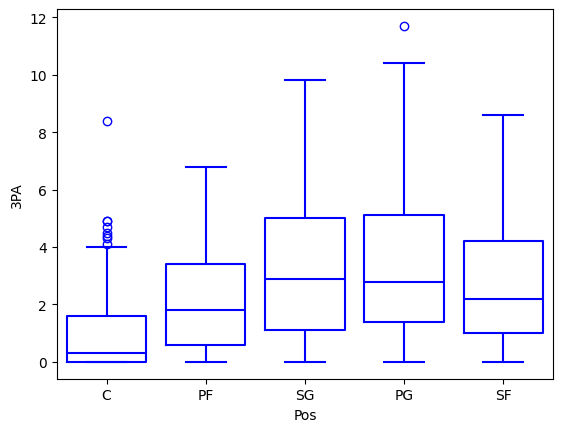

In [184]:
sns.boxplot(df_corr, x='Pos', y='3PA', fill=False, color='blue')

<Axes: xlabel='Pos', ylabel='3P'>

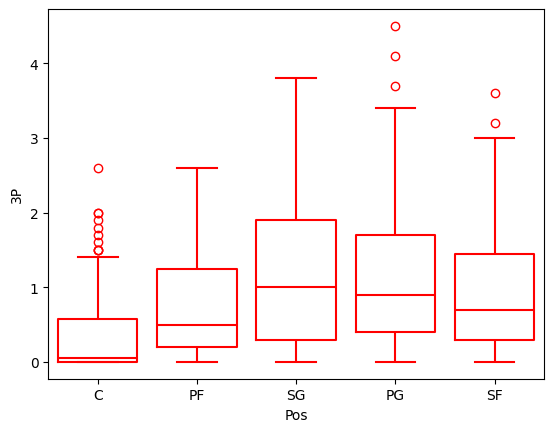

In [185]:
sns.boxplot(df_corr, x='Pos', y='3P', fill=False, color='red')

##### 2 Pontos

<Axes: xlabel='Pos', ylabel='2PA'>

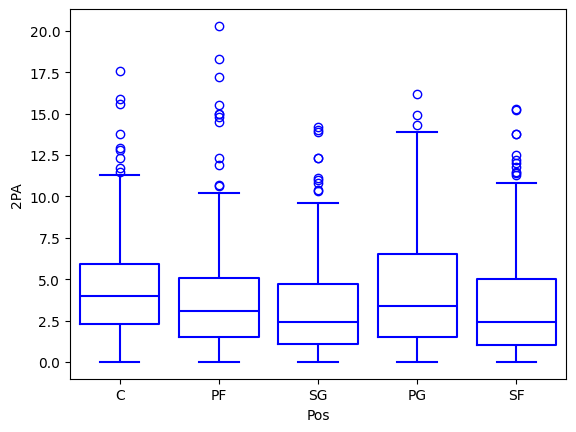

In [186]:
sns.boxplot(df_corr, x='Pos', y='2PA', fill=False, color='blue')

<Axes: xlabel='Pos', ylabel='2P'>

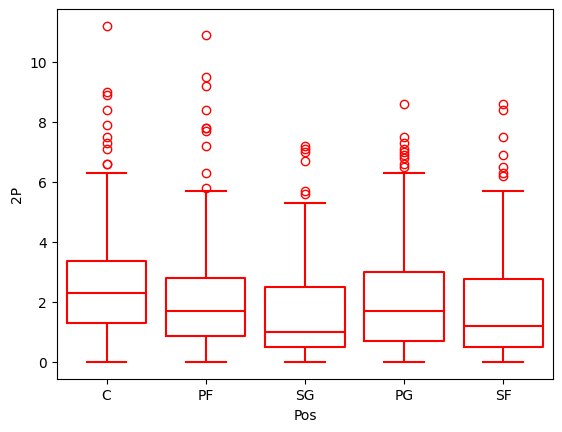

In [187]:
sns.boxplot(df_corr, x='Pos', y='2P', fill=False, color='red')

Após análise dos dados de correlação, o grupo optou por efetuar uma análise de distribuição dos valores com os principais atributos do basquete, independetemente de terem alta correlação com a classe alvo ou não. É possível observar que há uma diferença entre classes em assistências e tentativas de arremessos para 3 pontos. 

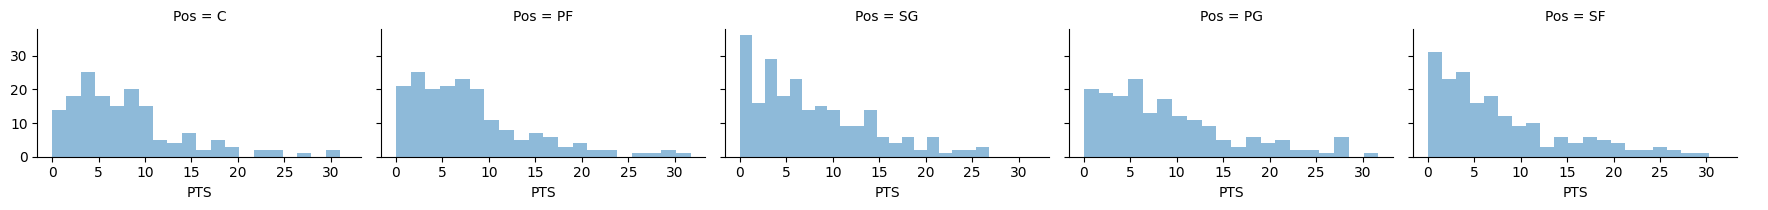

In [188]:
grid_pts = sns.FacetGrid(df_corr, col='Pos', height=2.2, aspect=1.6)
grid_pts.map(plt.hist, 'PTS', alpha=.5, bins=20)
grid_pts.add_legend()

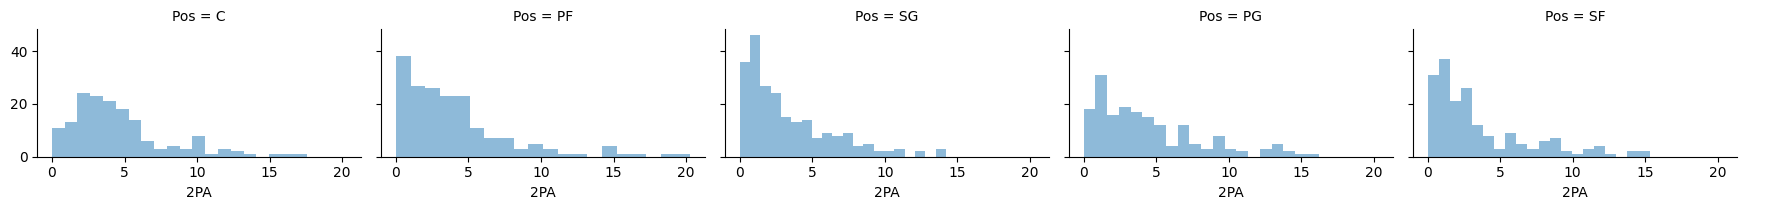

In [189]:
grid_2pa = sns.FacetGrid(df_corr, col='Pos', height=2.2, aspect=1.6)
grid_2pa.map(plt.hist, '2PA', alpha=.5, bins=20)
grid_2pa.add_legend()

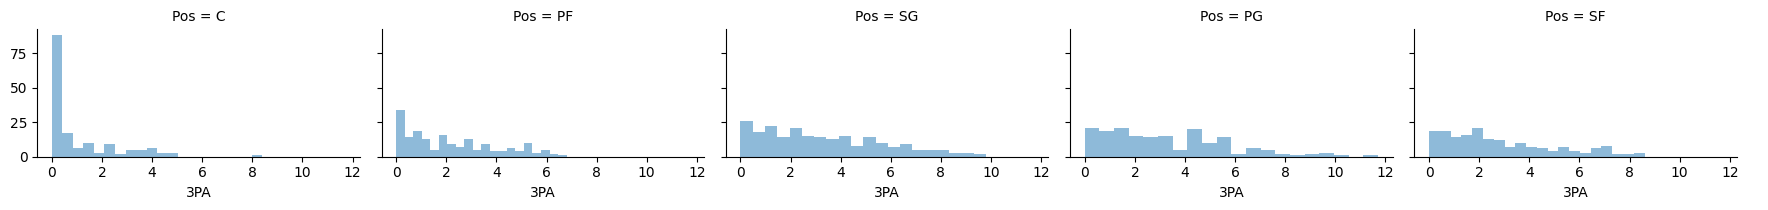

In [190]:
grid_3pa = sns.FacetGrid(df_corr, col='Pos', height=2.2, aspect=1.6)
grid_3pa.map(plt.hist, '3PA', alpha=.5, bins=20)
grid_3pa.add_legend()

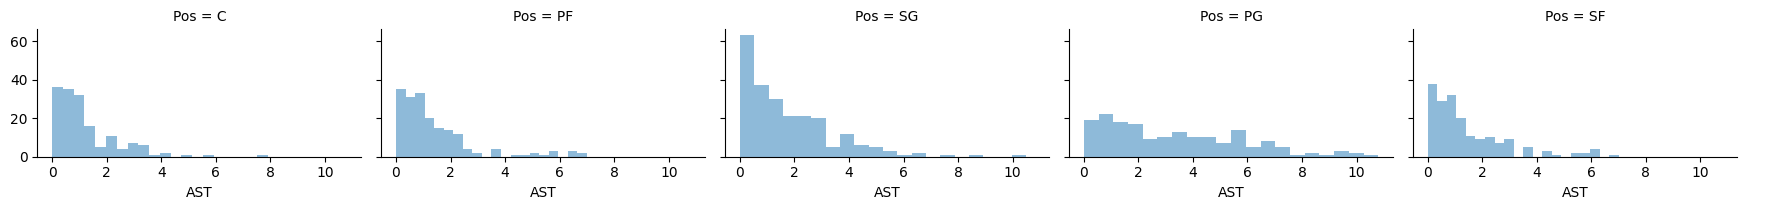

In [191]:
grid_ast = sns.FacetGrid(df_corr, col='Pos', height=2.2, aspect=1.6)
grid_ast.map(plt.hist, 'AST', alpha=.5, bins=20)
grid_ast.add_legend()

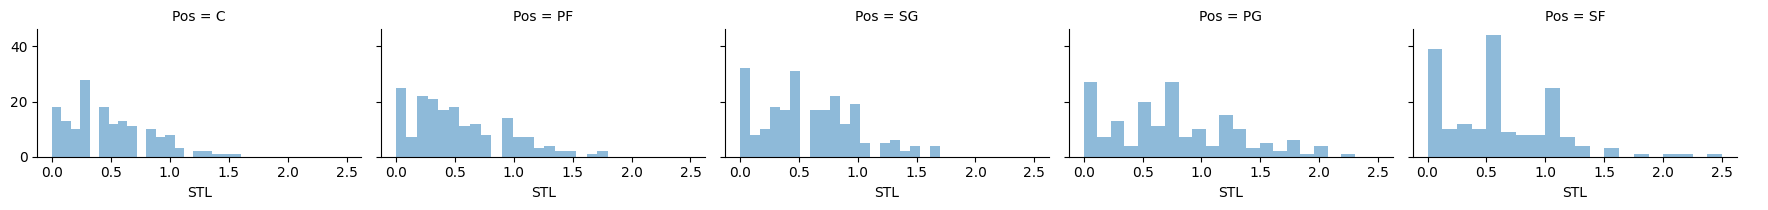

In [192]:
grid_stl = sns.FacetGrid(df_corr, col='Pos', height=2.2, aspect=1.6)
grid_stl.map(plt.hist, 'STL', alpha=.5, bins=20)
grid_stl.add_legend()

Com base na leitura dos dados, o grupo realizou um gráfico de dispersão com as colunas principais para saber a distribuição dos dados e as correlações entre features com valores plotados.

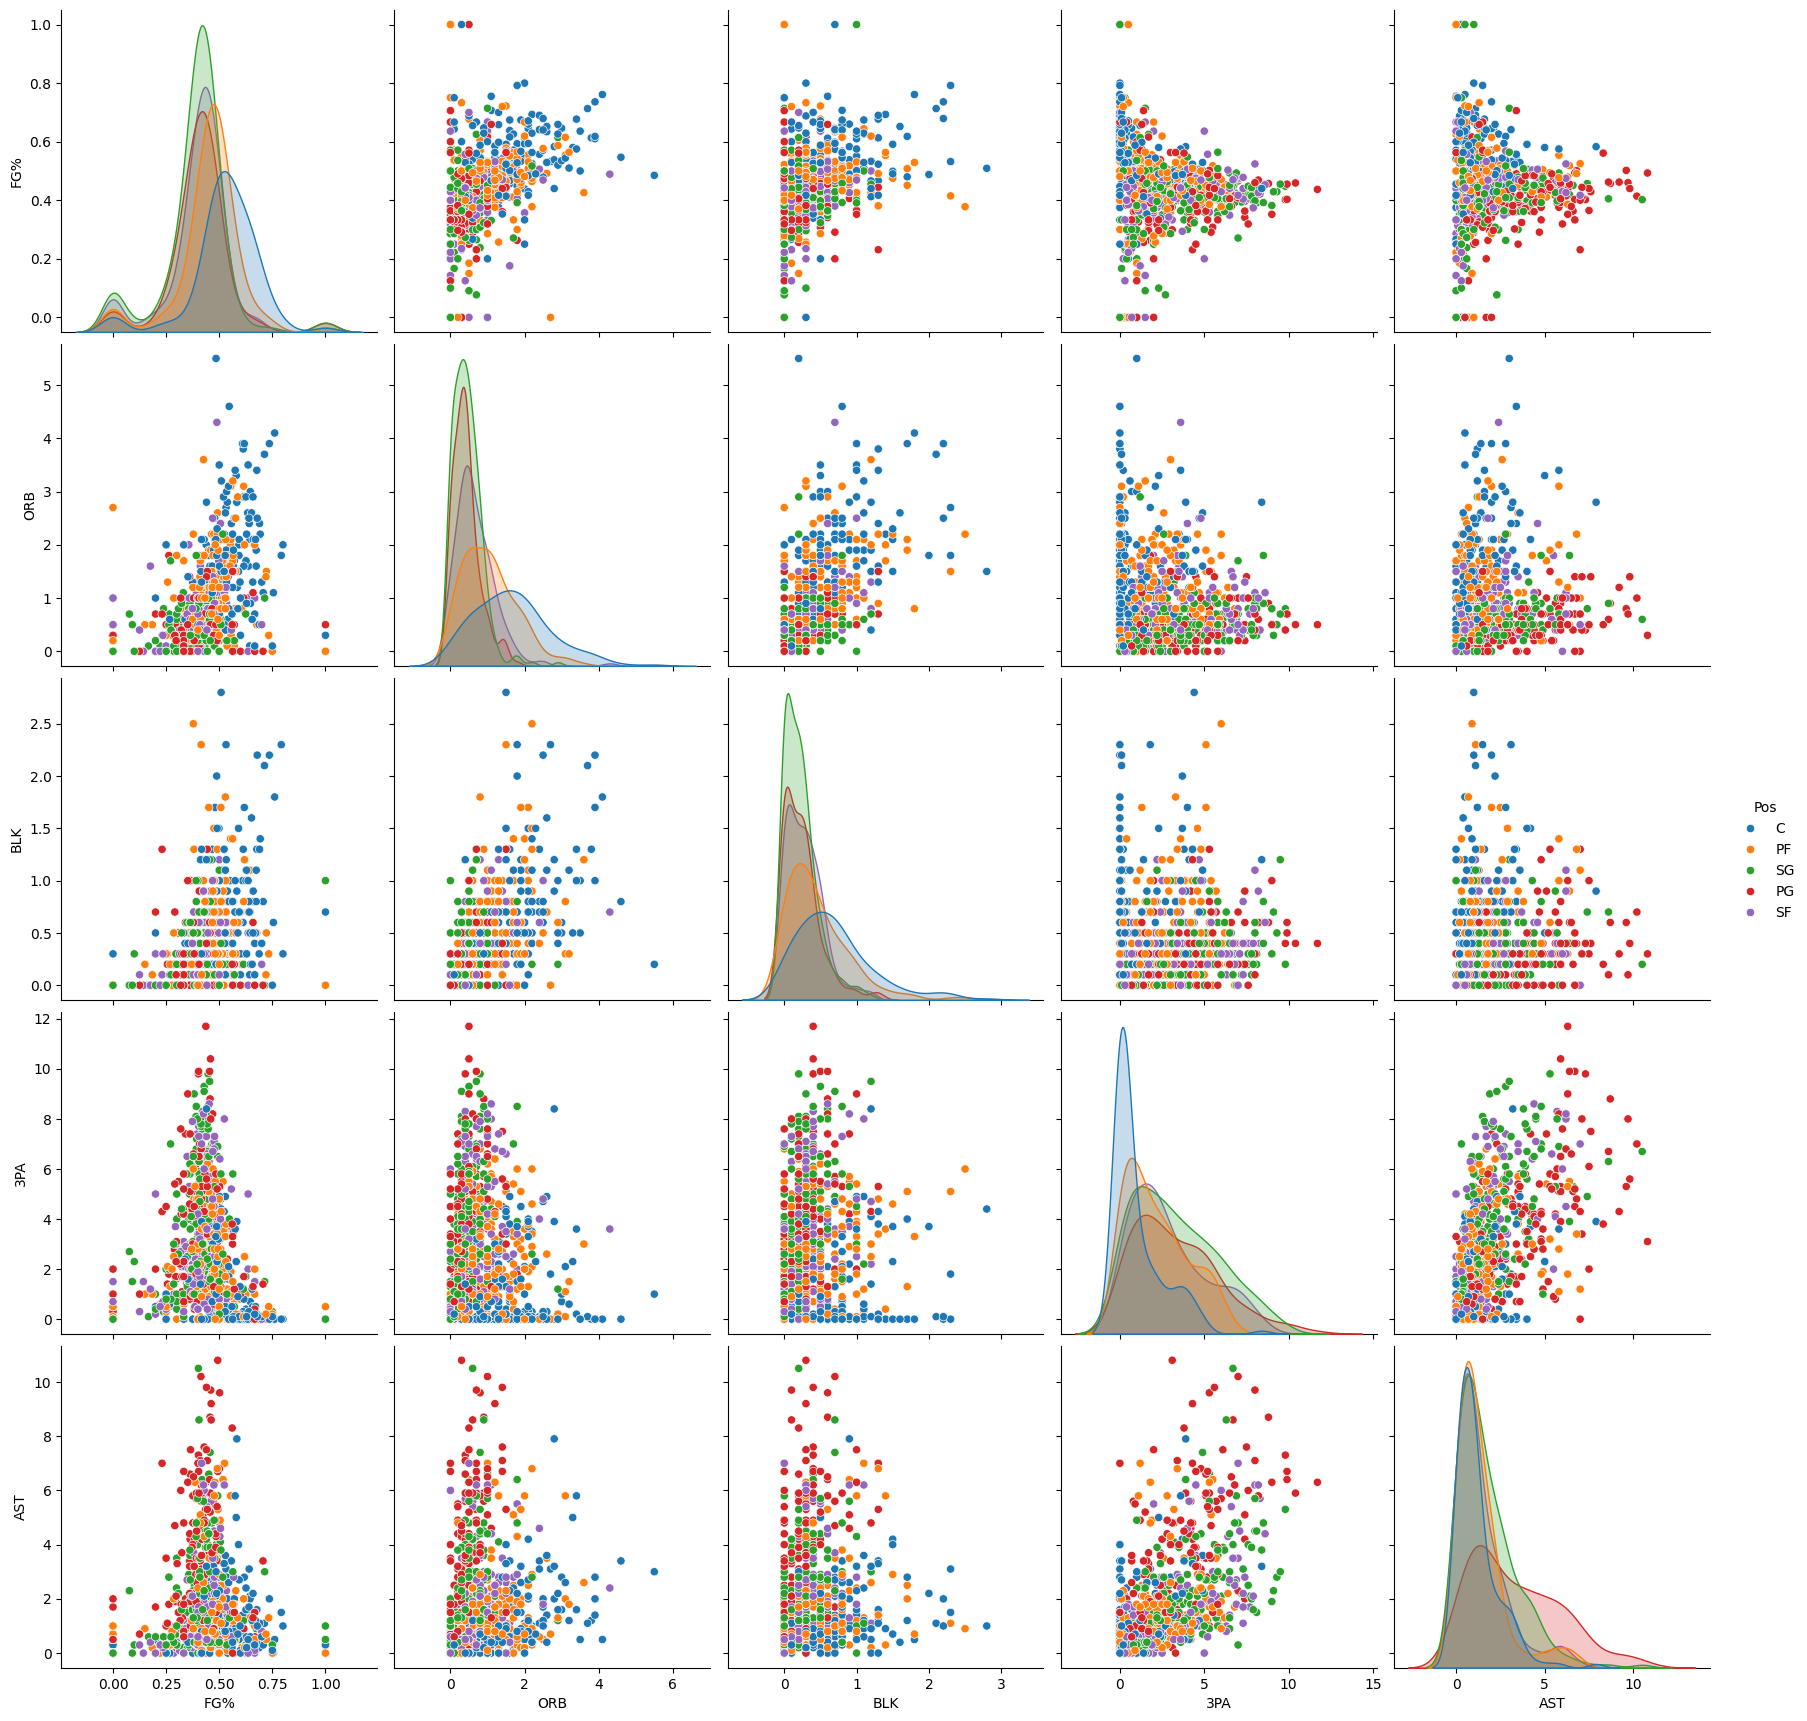

In [193]:
teste = df_corr[['FG%', 'ORB', 'BLK', '3PA', 'AST', 'Pos']]
sns.pairplot(teste, hue='Pos', height=3.5)

## **3. Pré Processamento**

PLACEHOLDER

Com base nas validações efetuadas na etapa da EDA, o grupo optou por realizar as seguintes remoções e ajustes, de forma a obter o dataset final a ser utilizado para as predições.

Removendo as linhas com Time igual a TOT.

In [194]:
times_para_remover = df_total[df_total['Tm'] == 'TOT'].index
df_final = df_final.drop(posicoes_para_remover)
df_base = df_base.drop(posicoes_para_remover)
df_final['Pos'].unique()

array(['C', 'PF', 'SG', 'PG', 'SF'], dtype=object)

Removendo as linhas com minutos jogados menores a 1 minuto.

In [195]:
linhas_para_remover = df_total[df_total['MP'] < 10].index
df_final = df_final.drop(linhas_para_remover)

Selecionando as principais colunas encontradas após a EDA.

In [196]:
df_final = df_final[['ORB', 'BLK', '3PA', 'AST', 'Pos']]

## 4. **Etapa de Classificação**

PLACEHOLDER

Tratando dados faltantes para 5 features (5 classes) para Naive Bayes...

--- Distribuição dos Dados ---
Dataset pronto. Treino: 651 amostras, Teste: 279 amostras.
Features utilizadas: ['DRB', 'ORB', 'BLK', '3PA', 'AST']
Dados numéricos normalizados (StandardScaler).

Modelo Naive Bayes treinado com sucesso!

--- Resultado Final (Gaussian Naive Bayes com 5 Features Otimizadas) ---
Acurácia (Accuracy) do modelo com 5 classes: 0.4659 (46.59%)

Relatório de Classificação Detalhado (5 Classes):
              precision    recall  f1-score   support

           C       0.68      0.57      0.62        47
          PF       0.44      0.31      0.36        55
          PG       0.63      0.32      0.42        53
          SF       0.52      0.29      0.37        55
          SG       0.37      0.77      0.50        69

    accuracy                           0.47       279
   macro avg       0.53      0.45      0.46       279
weighted avg       0.51      0.47      0.45       279



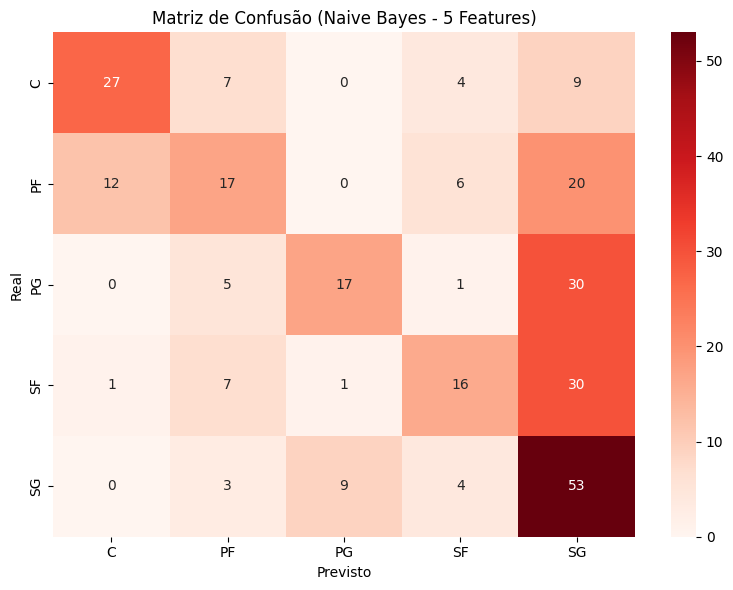

In [197]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. FEATURE ENGINEERING E PRÉ-PROCESSAMENTO ---

selected_features = ['DRB', 'ORB', 'BLK', '3PA', 'AST']
target_column = 'Pos'

# Assumindo que 'df_total' é o seu DataFrame carregado
df = df_total.copy()

print(f"Tratando dados faltantes para {len(selected_features)} features (5 classes) para Naive Bayes...")

for col in selected_features:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Imputação de valores faltantes (NaN) com a média da coluna
    mean_value = df[col].mean()
    df[col] = df[col].fillna(mean_value)

# 2. Seleção de Features (X) e Target (y)
X = df[selected_features]
y = df[target_column]

# 3. Codificação do Target
le = LabelEncoder()
y_encoded = le.fit_transform(y)
position_names = le.classes_

# 4. Divisão dos Dados em Treino e Teste (70/30 estratificado)
# O 'stratify=y_encoded' garante a distribuição proporcional das classes.
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded
)

print("\n--- Distribuição dos Dados ---")
print(f"Dataset pronto. Treino: {len(X_train)} amostras, Teste: {len(X_test)} amostras.")
print(f"Features utilizadas: {selected_features}")

# 5. Normalização (Escalonamento) dos Dados
# CRUCIAL PARA NAIVE BAYES GAUSSIANO
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Dados numéricos normalizados (StandardScaler).")


# --- 2. TREINAMENTO E AVALIAÇÃO DO MODELO GAUSSIAN NAIVE BAYES ---

# 6. Treinamento do Modelo Gaussian Naive Bayes
model_nb = GaussianNB()
# Treinamos com os dados NORMALIZADOS
model_nb.fit(X_train_scaled, y_train)

print("\nModelo Naive Bayes treinado com sucesso!")

# 7. Previsão e Avaliação
y_pred = model_nb.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print("\n--- Resultado Final (Gaussian Naive Bayes com 5 Features Otimizadas) ---")
print(f"Acurácia (Accuracy) do modelo com 5 classes: {accuracy:.4f} ({accuracy*100:.2f}%)")

# 8. Relatório Detalhado de Classificação
print("\nRelatório de Classificação Detalhado (5 Classes):")
print(classification_report(y_test, y_pred, target_names=position_names, zero_division=0))

# Gera a matriz de confusão para o modelo final
cm_final = confusion_matrix(y_test, y_pred)

# Plotagem da Matriz de Confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_final,
            annot=True,
            fmt='d',
            cmap='Reds',
            xticklabels=position_names,
            yticklabels=position_names)

plt.title(f'Matriz de Confusão (Naive Bayes - {len(selected_features)} Features)')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.tight_layout()
plt.show()

## Análise do desempenho do modelo Naive Bayes:
A acurácia foi avaliada utilizando duas abordagens: a base completa, contendo todas as colunas numéricas disponíveis, e a base processada, com seleção de features relevantes (FG%, ORB, BLK, 3PA, AST). Observou-se que a base processada apresentou melhor desempenho, atingindo 39,5% de acurácia, contra 35,0% da base completa. Essa diferença de 4,5% evidencia que o pré-processamento e a seleção cuidadosa de variáveis contribuem para uma classificação mais confiável, mesmo utilizando um modelo simples como Naive Bayes. Apesar da acurácia ainda ser moderada, este exercício mostra a importância da exploração de dados e pré-processamento antes da aplicação de algoritmos de classificação.